In [1]:
import numpy as np
from matplotlib import pyplot as pl
import ipywidgets

%matplotlib inline

In [2]:
pl.rc('font', family='serif', size=16)

In [3]:
def rho_red_light(x, rho_max):
    rho = np.full_like(x, rho_max)
    #rho = rho_max * np.ones_like(x)
    mask = np.where(x<3.0)
    rho[mask] /= 2
    #rho[mask] = rho_max/2
    return rho

In [4]:
#set parameters
nx = 81
L = 4.0
dx = L / (nx - 1)
x = np.linspace(0.0, L, num = nx)

rho_max = 10.0
u_max = 1.0

rho0 = rho_red_light(x, rho_max)

In [5]:
def plot(n, x, rho_hist):
    pl.figure()
    pl.grid()
    pl.title('Time step: {}'. format(n))
    pl.xlabel('Road [km]')
    pl.ylabel('Traffic density [car/h]')
    pl.plot(x, rho_hist[n])
    pl.xlim(x[0], x[-1])
    pl.ylim(4.0, 11.0)
    pl.show()

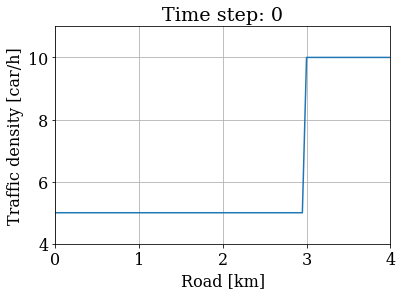

In [6]:
plot(0, x, [rho0])

In [7]:
def traffic_speed(rho, u_max, rho_max):
    return u_max * (1 - rho / rho_max)

def traffic_flux(rho, u_max, rho_max):
    return rho * traffic_speed(rho, u_max, rho_max)

In [8]:
def interactive_plot(x, rho_hist):
    nt = len(rho_hist)-1
    nt_slider = ipywidgets.IntSlider(value=0, min=0, max=nt, step=1, description='time step')
    w = ipywidgets.interactive(plot, n=nt_slider, x=ipywidgets.fixed(x), rho_hist=ipywidgets.fixed(rho_hist))
    return w

In [9]:
interactive_plot(x,[rho0])

interactive(children=(IntSlider(value=0, description='time step', max=0), Output()), _dom_classes=('widget-int…

In [10]:
def lax_fniedrichs(rho0, nt, dt, dx, u_max, rho_max):
    rho_hist = [rho0.copy()]
    rho = rho0.copy()
    nx = len(rho0)
    #nx = rho0.size
    for n in range(nt):
        rhon = rho.copy()
        F = traffic_flux(rhon, u_max, rho_max)
        for i in range(1, nx - 1):
            rho[i] = (1/2 * (rhon[i-1]+rhon[i+1]) - dt/(2*dx) * (F[i+1]-F[i-1]))
            
        #rho[1:-1] = 1/2 * (rho[:-2] + rho[2:]) - dt /(2*dx) * (F[2:]-F[:-2])
        rho_hist.append(rho.copy())
        
    return rho_hist

In [11]:
nt = 40
sigma = 1.0
dt = sigma/u_max*dx
rho_hist = lax_fniedrichs(rho0, nt, dt, dx, u_max, rho_max)

interactive_plot(x, rho_hist)

interactive(children=(IntSlider(value=0, description='time step', max=40), Output()), _dom_classes=('widget-in…

In [12]:
sigma = 0.5
dt = sigma * dx/ u_max
nt = 80

rho_hist = lax_fniedrichs(rho0, nt, dt, dx, u_max, rho_max)

interactive_plot(x, rho_hist)

interactive(children=(IntSlider(value=0, description='time step', max=80), Output()), _dom_classes=('widget-in…

In [17]:
def traffic_jacobian(rho, u_max, rho_max):
    J = u_max * (1 - 2*rho / rho_max)
    return J

def lax_wendroff(rho0, nt, dt, dx, u_max, rho_max):
    rho_hist = [rho0.copy()]
    rho = rho0.copy()
    for n in range(nt):
        F = traffic_flux(rho, u_max, rho_max)
        J = traffic_jacobian(rho, u_max, rho_max)
        rho[1:-1] = (rho[1:-1] - dt /(2*dx) * (F[2:]-F[:-2]) + dt**2 /
                     (4 * dx**2) * ((J[1:-1]+J[2:])*(F[2:]-F[1:-1]) - (J[1:-1]+J[:-2])*(F[1:-1]-F[:-2])))
        rho_hist.append(rho.copy())
    return rho_hist

In [18]:
sigma = 1.0
dt = sigma * dx/ u_max
nt = 40
rho_hist = lax_wendroff(rho0, nt, dt, dx, u_max, rho_max)
interactive_plot(x, rho_hist)

interactive(children=(IntSlider(value=0, description='time step', max=40), Output()), _dom_classes=('widget-in…